# Black-Karasinski Rates Asymptotic Expansion

In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.append('..')

In [3]:
from functional_space.lib.fspace import Func, Functional, funcs_1d

In [4]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')

## Variables

In [5]:
r_bar     = 0.02
alpha_x   = 0.15
alpha_y   = 0.02
sigma_x   = 0.20
sigma_y   = 0.10
rho       = -0.30
s         = 0.0

t0        = 1.0
Time      = np.linspace(start=1,  stop=5,  num=9)
x0        = 0.4
X         = np.linspace(start=-1, stop=1., num=11)
y0        = 0.5
Y         = np.linspace(start=-1, stop=1., num=11)

## Functions

\begin{align}
\Delta(t, v) = \int_{t}^{v}\bar{r}(u)du
\end{align}

In [7]:
delta = Func(lambda t,v: Functional(r_bar, x0=t, x1=v, du=True)())

\begin{align}
D(t,v) = e^{-\Delta(t,v)}
\end{align}

In [8]:
D = Func(lambda t,v: funcs_1d.exp(-delta(t,v=v)))

\begin{align}
\phi_x(t,v) &= e^{-\alpha_x(v-t)}
\end{align}

In [9]:
phi_x = Func(lambda t,v: funcs_1d.exp(-alpha_x*(v-t)))

\begin{align}
\phi_y(t,v) &= e^{-\alpha_y(v-t)}
\end{align}

In [10]:
phi_y = Func(lambda t,v: funcs_1d.exp(-alpha_y*(v-t)))

\begin{align}
\Sigma_{x x}(t,v) &= \frac{\sigma^2_x}{2\alpha_x}\left(1-e^{-2\alpha_x(v-t)}\right)\\
\end{align}

In [11]:
sigma_xx = Func(lambda t,v: (pow(sigma_x,2))/(2*alpha_x)*(1-funcs_1d.exp(-2*alpha_x*(v-t))))

\begin{align}
\Sigma_{xy}(t,v) &= \frac{\rho \sigma_x\sigma_y}{\alpha_x+\alpha_y}\left(1-e^{-(\alpha_x+\alpha_y)(v-t)}\right)
\end{align}

In [12]:
sigma_xy = Func(lambda t, v:
               ((rho*sigma_x*sigma_y)/(alpha_x+alpha_y))*(
               1-funcs_1d.exp(-(alpha_x+alpha_y)*(v-t)))
               )

\begin{align}
\Sigma_{y y}(t,v) &= \frac{\sigma^2_y}{2\alpha_y}\left(1-e^{-2\alpha_y(v-t)}\right)\\
\end{align}

In [13]:
sigma_yy = Func(lambda t,v: (pow(sigma_y,2))/(2*alpha_y)*(
1-funcs_1d.exp(-2*alpha_y*(v-t))))

\begin{align}
\Sigma^{*}(t,u) &= \phi^2_x(t,u)\Sigma_{xx}(0,t)
+2\phi_x(t,u)\phi_y(t,u)\Sigma_{xy}(0,t)+\phi_y^2(t,u)\Sigma_{yy}(0,t)\\
\end{align}

In [14]:
sigma_star = Func(lambda t,u:
                 pow(phi_x(t,v=u),2)*sigma_xx(0,v=t) +
                 2*phi_x(t, v=u)*phi_y(t,v=u)*sigma_xy(0,v=t)+
                 pow(phi_y(t,v=u),2)*sigma_yy(0,v=t) 
                 )

\begin{align}
\tilde{r}_1 &= \bar{r}(t) - s(t)\\
\end{align}

In [15]:
r1_tilde = Func(lambda t: r_bar - s)

\begin{align}
R_1(x,y,t,t_1)&= \tilde{r}_1(t_1)e^{\phi_x(t,t_1)x+\phi_y(t,t_1)y - \frac{1}{2}\Sigma^{*}(t,t_1)}
\end{align}

In [16]:
R1 = Func(lambda x, y, t, t1:
          r1_tilde(t1)*
          funcs_1d.exp(phi_x(t,v=t1)*x + 
                       phi_y(t,v=t1)*y -
                       0.5*sigma_star(t, u=t1))
         )

\begin{align}
F_{xy}(t,t_1,t_2) &= \phi_x(t_1,t_2)\Sigma_{xx}(t,t_1)+[\phi_x(t_1,t_2)+\phi_y(t_1,t_2)]\Sigma_{xy}(t,t_1)+\phi_y(t_1, t_2)\Sigma_{yy}(t,t_1)\\
\end{align}

In [17]:
F_xy = Func(lambda t,t1,t2: 
            phi_x(t1,v=t2)*sigma_xx(t,v=t1) +
            (phi_x(t1, v=t2)+phi_y(t1,v=t2)
            )*sigma_xy(t,v=t1)
            +
            phi_y(t1, v=t2)*sigma_yy(t,v=t1)
           )

\begin{align}
\tilde{r}_2(t) &= \tilde{r}_1(t)\int_{0}^{t}\tilde{r}_1(t_1)(e^{F_{xy}(0,t_1,t)}-1)dt_1
\end{align}

In [18]:
r2_integrand = Func(lambda t, t1:
                   r1_tilde(t1)*(
                   funcs_1d.exp(F_xy(0,t1=t1,t2=t))-1))

In [19]:
r2_tilde = Func(lambda t: r1_tilde(t)*
               Functional(r2_integrand(t=t),x0=0, x1=t, du=True)()
               )

\begin{align}
R_2(x,y,t,t_1) &= \tilde{r}_2(t_1)e^{\phi_x(t,t_1)x+\phi_y(t,t_1)y - \frac{1}{2}\Sigma^{*}(t,t_1)}
\end{align}

In [20]:
R2 = Func(lambda x, y, t, t1:
          r2_tilde(t1)*
          funcs_1d.exp(phi_x(t,v=t1)*x + 
                       phi_y(t,v=t1)*y-
                       0.5*sigma_star(t, u=t1))
         )

\begin{align}
f^1(x,y,t,T) &= \int^T_t[R_1(x,y,t,t_1) - \tilde{r}_1(t_1)]dt_1\\
\end{align}

In [21]:
f1 = Func(lambda x,y,t,T: 
          Functional(Func(lambda x,y,t,t1:R1(t1,x=x,y=y,t=t)-r1_tilde(t1))(x=x,y=y,t=t), x0=t, x1=T, du=True)()
         )

\begin{align}
f^2(x,y,t,T) &=  \frac{1}{2}\left(\int^T_t [R_1(x,y,t,t_1)-\tilde{r}_1(t_1)]dt_1\right)^2\\
\end{align}

In [22]:
f2 = Func(lambda x,y,t,T: 
         0.5 * pow(Functional(
              Func(
                  lambda x,y,t,t1:
                  R1(t1,x=x,y=y,t=t)-r1_tilde(t1)
              )
             (x=x,y=y,t=t),
              x0=t, x1=T, du=True)(),2))

\begin{align}
f^{3^\prime}(x,y,t,t_2) &= \int_t^{t_2}[R_1(x,y,t,t_1)(e^{F_{xy}(t,t_1,t_2)}-1)]dt_1
\end{align}

In [23]:
f3_prime = Func(lambda x,y,t,t2:
                Functional(
                    Func(
                        lambda x,y,t,t1,t2:
                        R1(t1,x=x,y=y,t=t)*(
                            funcs_1d.exp(F_xy(t1,t=t,t2=t2))-1)
                    )
                    (x=x,y=y,t=t,t2=t2),
                 x0=t, x1=t2, du=True)())

\begin{align}
f^3(x,y,t,T) &= \int_t^T [R_1(x,y,t,t_2)f^{3^\prime}(x,y,t,t_2) - R_2(x,y,t,t_2) ]dt_2\\
\end{align}

In [24]:
f3_integrand = Func(lambda x,y,t,t2:
                   R1(t2,x=x,y=y,t=t)*f3_prime(t2,x=x,y=y,t=t)-
                   R2(t2,x=x,y=y,t=t)
                   )

In [25]:
f3 = Func(lambda x,y,t,T:
         Functional(
         f3_integrand(x=x,y=y,t=t),
         x0=t, x1=T, du=True)())

\begin{align}
\boxed{
F^T_1(x,y,t,T) = D(t,T)(1-f^1)
}
\end{align}

In [26]:
F1 = Func(lambda x,y,t,T: D(t, v=T)*(1-f1(t,x=x,y=y, T=T)))

\begin{align}
\boxed{
F^T_2(x,y,t,T) = D(t,T)(1-f^1+f^2+f^3)
}
\end{align}

In [27]:
F2 = Func(lambda x,y,t,T: 
         D(t,v=T)*(1
                   -f1(t,x=x,y=y,T=T)
                   +f2(t,x=x,y=y,T=T)
                   +f3(t,x=x,y=y,T=T)))

## Results

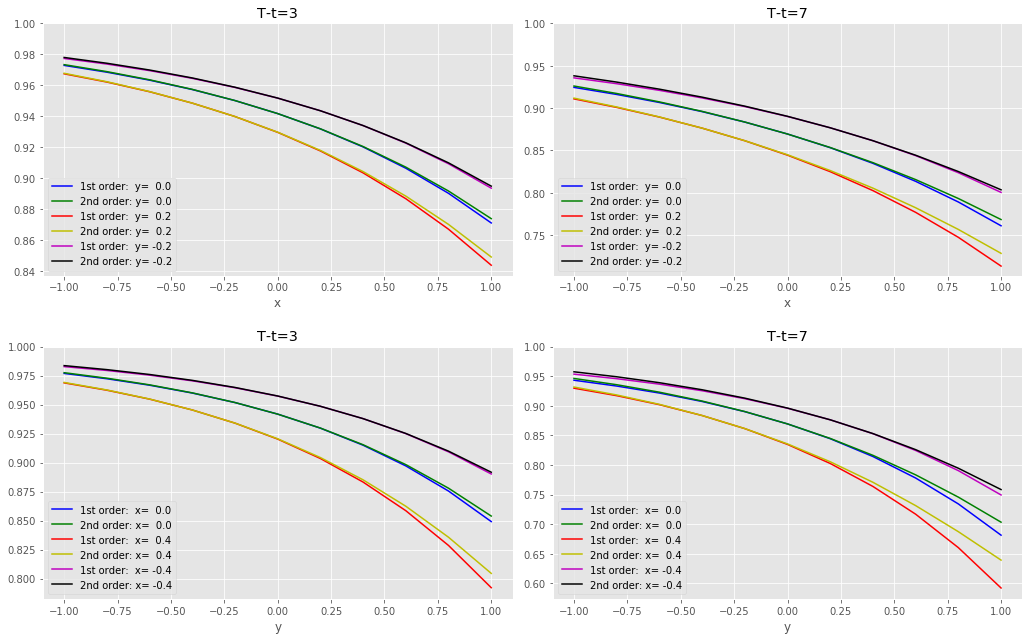

In [28]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=list('bgrymk'))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9*1.6,9))

ys = [_ * sigma_y for _ in [0,2,-2]]

TT = 3
for y in ys:
    ax1.plot(X, [F1(x=s, y=y,  t=0)(TT) for s in X],  label='1st order:{} y={:5}'.format(' ',y))
    ax1.plot(X, [F2(x=s, y=y,  t=0)(TT) for s in X],  label='2nd order: y={:5}'.format(y))
ax1.set_ylim(ymax=1.)
ax1.set_xlim(xmax=1.1)
ax1.set_xlabel('x')
ax1.set_title('T-t={}'.format(TT))
ax1.legend(loc='lower left')


TT = 7
for y in ys:
    ax2.plot(X, [F1(x=s, y=y,  t=0)(TT) for s in X],  label='1st order:{} y={:5}'.format(' ',y))
    ax2.plot(X, [F2(x=s, y=y,  t=0)(TT) for s in X],  label='2nd order: y={:5}'.format(y))
ax2.set_xlabel('x')
ax2.set_ylim(ymax=1.)
ax2.set_xlim(xmax=1.1)
ax2.set_title('T-t={}'.format(TT))
ax2.legend(loc='lower left')

xs =[_ * sigma_x for _ in [0,2,-2]]

TT = 3
for x in xs:
    ax3.plot(Y, [F1(x=x, y=s,  t=0)(TT) for s in Y],  label='1st order:{} x={:5}'.format(' ',x))
    ax3.plot(Y, [F2(x=x, y=s,  t=0)(TT) for s in Y],  label='2nd order: x={:5}'.format(x))
ax3.set_ylim(ymax=1.)
ax3.set_xlim(xmax=1.1)
ax3.set_xlabel('y')
ax3.set_title('T-t={}'.format(TT))
ax3.legend(loc='lower left')

TT = 7
for x in xs:
    ax4.plot(Y, [F1(x=x, y=s,  t=0)(TT) for s in Y],  label='1st order:{} x={:5}'.format(' ',x))
    ax4.plot(Y, [F2(x=x, y=s,  t=0)(TT) for s in Y],  label='2nd order: x={:5}'.format(x))
ax4.set_ylim(ymax=1.)
ax4.set_xlim(xmax=1.1)
ax4.set_xlabel('y')
ax4.set_title('T-t={}'.format(TT))
ax4.legend(loc='lower left')


plt.tight_layout(h_pad=2, w_pad=None)
plt.show()